## Trabalho de Conclusão de Curso - TCC
#### Turma - DSA T212
#### Aluno : Drausio Gomes dos Santos
#### Orientadora: Gabrielle Maria Romeiro Lombardi
#### Tema: Construção e uso de modelos de grafos para representação e análise da estrutura organizacional da administração pública federal.
### Resultados Preliminares

### Etapa 8: Modelo de Regressão para avaliação do tempo de carga total


In [10]:
!pip install pyforest
!pip install dplython
!pip install plotnine
!pip install statstests

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [11]:
import time
import datetime as dt
from datetime import datetime
import pickle
import igraph as ig
from igraph import *
print("igraph : ",ig.__version__)
import pandas as pd
import pytz
import numpy as np

from pyforest import * #Principais Libs utilizadas no python (pandas, numpy,seaborn, matplotlib ...)
from plotnine import * #Utilização das principais funcionalidades do ggplot2 nativo do R no python
from dplython import * #Utilizado das principais funcionalidades do pacote nativo do R, dplyr no Python
from scipy.stats import norm #Criações de distribuições normais
from scipy.stats.distributions import chi2 #Cálculo do teste estátistico qui2
from sklearn.preprocessing import PowerTransformer #Transformações de box-cox 

import statsmodels.api as sm #Utilização de teste Anova
import statsmodels.stats.diagnostic as dgn
import statsmodels.stats.stattools as stt
import statstests.tests as statt
import statsmodels.formula.api as smf #Criação de modelos de regressão linear/não linear
import warnings #Retirar warnings de bibliotecas auxiliares
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.special import boxcox, inv_boxcox

class Main:     
    def show_current_time(self):
        tz_SP = pytz.timezone('America/Sao_Paulo') 
        now = datetime.now(tz_SP)
        current_time = now.strftime("%d/%m/%Y %H:%M:%S")
        print("Current Time =", current_time)
        return now

main = Main()
    


igraph :  0.10.1


In [52]:
arquivo_dataframe = "dataframe_parcial_2019_2021_400000.pkl"
df_mr = pickle.load(open(arquivo_dataframe, "rb"))
df_mr
d50 = df_mr[df_mr.percentual_carga == 50.0]
d50

<IPython.core.display.Javascript object>

,tamanho_amostra,percentual_carga,tempo,tempo_em_horas
99,396283,50.0,0 days 05:04:50.507244,5.080556
299,471629,50.0,0 days 17:17:58.855871,17.299444
499,558114,50.0,1 days 07:25:40.618181,31.427778


In [54]:
arquivo_dataframe = "dataframe_parcial_2019_2021_400000.pkl"
df_mr = pickle.load(open(arquivo_dataframe, "rb"))
d100 = df_mr[df_mr.percentual_carga == 100.0]
d100

<IPython.core.display.Javascript object>

,tamanho_amostra,percentual_carga,tempo,tempo_em_horas
199,396283,100.0,0 days 15:37:23.653437,15.623056
399,471629,100.0,1 days 15:05:59.800804,39.099722


In [13]:
df_mr.describe()

,tamanho_amostra,percentual_carga,tempo,tempo_em_horas
count,543.000000,543.000000,543,543.000000
mean,466653.226519,46.497238,0 days 14:47:46.859900123,14.796211
std,63588.141919,27.692091,0 days 12:22:14.971569237,12.370831
min,396283.000000,0.500000,0 days 00:00:04.909513,0.001111
25%,396283.000000,23.000000,0 days 04:27:44.426825500,4.462222
50%,471629.000000,45.500000,0 days 11:20:30.758963,11.341667
75%,558114.000000,68.000000,0 days 23:39:39.860475500,23.660972
max,558114.000000,100.000000,1 days 22:46:30.512114,46.775000


<IPython.core.display.Javascript object>

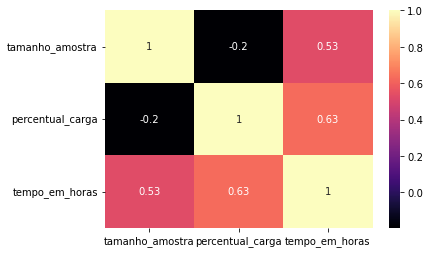

In [14]:

sns.heatmap(df_mr.corr(),annot=True,cmap = 'magma');

In [74]:
pd.set_option('display.max_columns', None) # coluna
pd.set_option('display.max_rows', None) # linha
df_mr_percentual_carga = df_mr[['percentual_carga','tamanho_amostra','tempo_em_horas']]
df_mr_percentual_carga

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,percentual_carga,tamanho_amostra,tempo_em_horas
0,0.5,396283,0.001111
1,1.0,396283,0.003611
2,1.5,396283,0.008056
3,2.0,396283,0.013611
4,2.5,396283,0.019722
5,3.0,396283,0.026389
6,3.5,396283,0.032500
7,4.0,396283,0.039167
8,4.5,396283,0.049167
9,5.0,396283,0.063889


X1 = df_mr_percentual_carga.drop(['tempo_em_horas'],axis=1)
#x1 = df_mr_percentual_carga['percentual_carga','tamanho_amostra']
y1 = df_mr_percentual_carga['tempo_em_horas']
modelo1 = (sm.OLS(y1,sm.add_constant(X1)).fit())
modelo1.summary(title='Sumário do modelo para cálculo do tempo de carga')

<IPython.core.display.Javascript object>

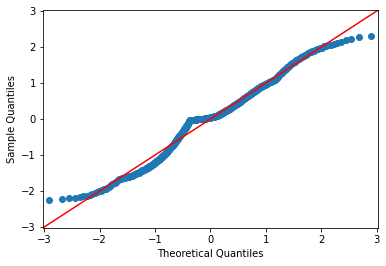

In [26]:
res1 = modelo1.resid
fig = sm.qqplot(res1, stats.norm, fit=True, line="45")
plt.show()

teste Kolmogorov-Smirnov para dist normal | (pvalue) 0.0009999999999998899
teste Jarque-Bera        para dist normal | (pvalue) 0.06114775279927665
--------------------------------------------------
method  :  Shapiro-Francia normality test
statistics W  :  0.9799042229095565
statistics z  :  4.530848248111724
p-value  :  2.937366377917489e-06


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

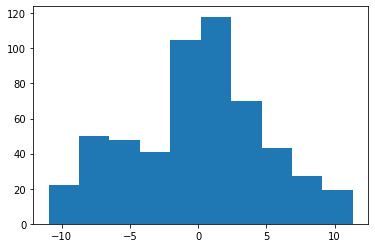

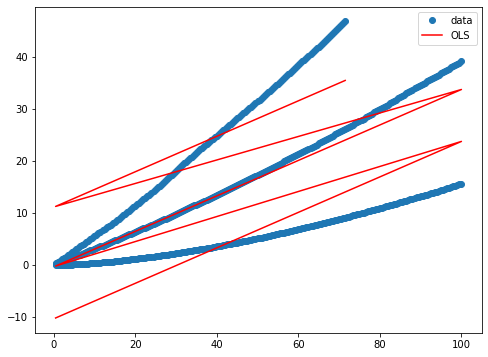

In [27]:
valores_test = dgn.kstest_normal(res1, dist='norm', pvalmethod='table')
print('teste Kolmogorov-Smirnov para dist normal | (pvalue)', valores_test[1])
valores_test_jb = stt.jarque_bera(res1)
print('teste Jarque-Bera        para dist normal | (pvalue)', valores_test_jb[1])
print('--------------------------------------------------')
statt.shapiro_francia(res1)
plt.hist(res1)
plt.plot()
pred_ols = modelo1.get_prediction()

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x1, y1, "o", label="data")
ax.plot(x1, modelo1.fittedvalues, "r", label="OLS")
ax.legend(loc="best")

In [70]:
print("Previsão do tempo de carga modelo regressão linear")

import math

ypred = modelo1.params.const +  modelo1.params.tamanho_amostra * 558114 + modelo1.params.percentual_carga * 100
print('100% -- ','|ypred -- ',ypred) 

ypred = modelo1.params.const +  modelo1.params.tamanho_amostra * 558114 + modelo1.params.percentual_carga * 50
print('50%  -- ','|ypred -- ',ypred) 



Previsão do tempo de carga modelo regressão linear
100% --  |ypred --  45.16179647947121
50%  --  |ypred --  28.108947462464897


Transformação BOX-COX


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Valor de Lambda: 0.39022185394618475
[-2.38239348 -2.27713139 -2.1721627  -2.08347116 -2.00885758 -1.9422153
 -1.88967932 -1.83885288 -1.77169347 -1.68657385 -1.60105969 -1.51807693
 -1.43621953 -1.35369834 -1.27263288 -1.19660411 -1.12255974 -1.05085814
 -0.97702871 -0.90546562 -0.83843203 -0.77329223 -0.7112     -0.65837159
 -0.60731539 -0.55907757 -0.50905105 -0.46199625 -0.41323883 -0.36191612
 -0.31342006 -0.26452789 -0.21561515 -0.16423541 -0.11273141 -0.06373262
 -0.01619094  0.03082084  0.07945304  0.12749782  0.17574108  0.22195977
  0.2651054   0.31096601  0.35253379  0.39186149  0.42995179  0.46644376
  0.50477985  0.5456713   0.58573897  0.62443265  0.66356915  0.70425962
  0.74435964  0.78371388  0.82235789  0.86209086  0.9019834   0.94065961
  0.97834469  1.01706151  1.0541622   1.09291095  1.1272599   1.16158103
  1.19602565  1.22938172  1.25975867  1.29328624  1.3288239   1.36243515
  1.39658806  1.43153657  1.46628761  1.50044129  1.5340187   1.56756678
  1.60121481  1

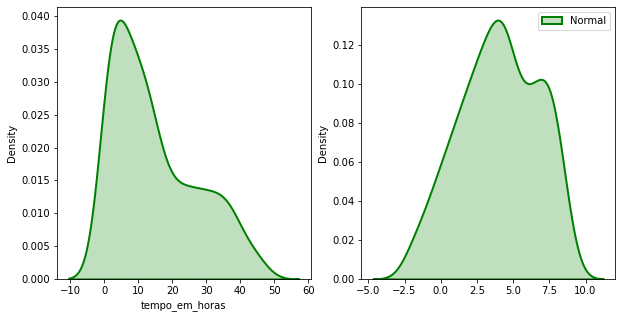

In [32]:
print("Transformação BOX-COX")

original_data = y1
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Valor de Lambda: {fitted_lambda}")
print(fitted_data)

In [33]:
print("Criação de novo modelo de regressão com y transformado")
X1T = df_mr.drop(['tempo_em_horas','tempo'],axis=1)
y1T = fitted_data
modelo1T = sm.OLS(y1T,sm.add_constant(X1T)).fit()
modelo1T.summary(title='Sumário do modelo para cálculo do tempo de carga')

Criação de novo modelo de regressão com y transformado


<class 'statsmodels.iolib.summary.Summary'>
"""
               Sumário do modelo para cálculo do tempo de carga               
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     3682.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          2.08e-315
Time:                        10:49:08   Log-Likelihood:                -582.52
No. Observations:                 543   AIC:                             1171.
Df Residuals:                     540   BIC:                             1184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -13.3446      0.246    -54.355      0.000     -13.827     -12.862
tamanho_amostra   2.907e-05   4.89e-07     59.503      0.000    2.81e-05       3e-05
percentual_carga     0.0811      0.001     72.269      0.000       0.079       0.083
==============================================================================
Omnibus:                      192.842   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              676.119
Skew:                          -1.645   Prob(JB):                    1.52e-147
Kurtosis:                       7.366   Cond. No.                     3.80e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
import math
print("Previsão do tempo de carga após tranformação BOX_COX")
ypredT = modelo1T.params.const +  modelo1T.params.tamanho_amostra * 558114 + modelo1T.params.percentual_carga * 100
print('100% -- ','|ypredT -- ',ypredT,'|ypred -- ', math.pow((ypredT * (fitted_lambda)) + 1, 1/fitted_lambda),' |inv_boxcox() ',inv_boxcox(ypredT,fitted_lambda)) 

ypredT = modelo1T.params.const +  modelo1T.params.tamanho_amostra * 558114 + modelo1T.params.percentual_carga * 50
print('50%  -- ','|ypredT -- ',ypredT,'  |ypred -- ', math.pow((ypredT * (fitted_lambda)) + 1, 1/fitted_lambda),'|inv_boxcox() ',inv_boxcox(ypredT,fitted_lambda)) 


Previsão do tempo de carga após tranformação BOX_COX
100% --  |ypredT --  10.988454839614304 |ypred --  71.37159806243776  |inv_boxcox()  71.37159806243776
50%  --  |ypredT --  6.93456343421535   |ypred --  28.701722539814764 |inv_boxcox()  28.70172253981476
